 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csvpath = Path('../hw3/Resources/whale_returns.csv')
whale_returns_df = pd.read_csv(csvpath)
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)


In [5]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
csv_path = Path("../hw3/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(csv_path)
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)

In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [9]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
csv_path=Path("../hw3/Resources/sp500_history.csv")
sp500_history_df=pd.read_csv(csv_path)
sp500_history_df


,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [11]:
# Check Data Types

sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace(',','')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

sp500_history_df.dtypes

C:\Users\16238\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Date      object
Close    float64
dtype: object

In [13]:
sp500_history_df.columns

Index(['Date', 'Close'], dtype='object')

In [14]:
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)

In [15]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()

In [16]:
# Drop nulls
sp500_history_df.dropna(inplace=True)

sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df = sp500_history_df.rename(columns={
    "Close": "SP500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join returns into a single DataFrame with columns for each portfolio's returns.

all_portfolios_df = pd.concat([whale_returns_df, algo_returns_df,sp500_history_df], axis="columns", join="inner"
)

all_portfolios_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

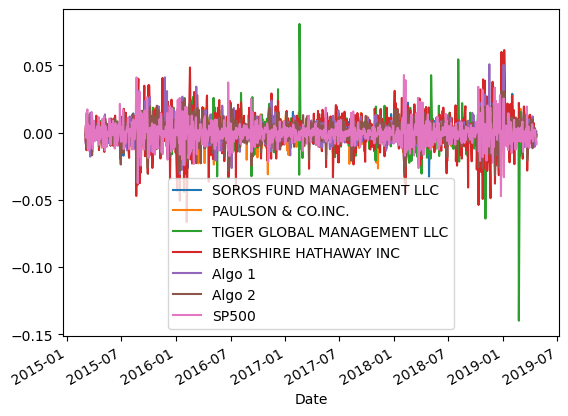

In [19]:
# Plot daily returns of all portfolios
all_portfolios_df.plot() 


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

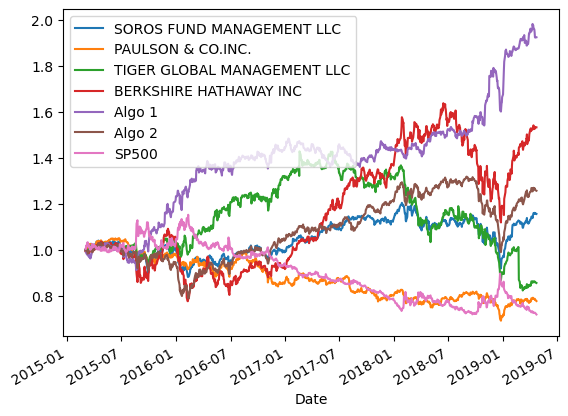

In [20]:
# Calculate cumulative returns of all portfolios
all_portfolios_cumulative_ret = (all_portfolios_df + 1).cumprod()

all_portfolios_cumulative_ret.head()

# Plot cumulative returns

all_portfolios_cumulative_ret.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

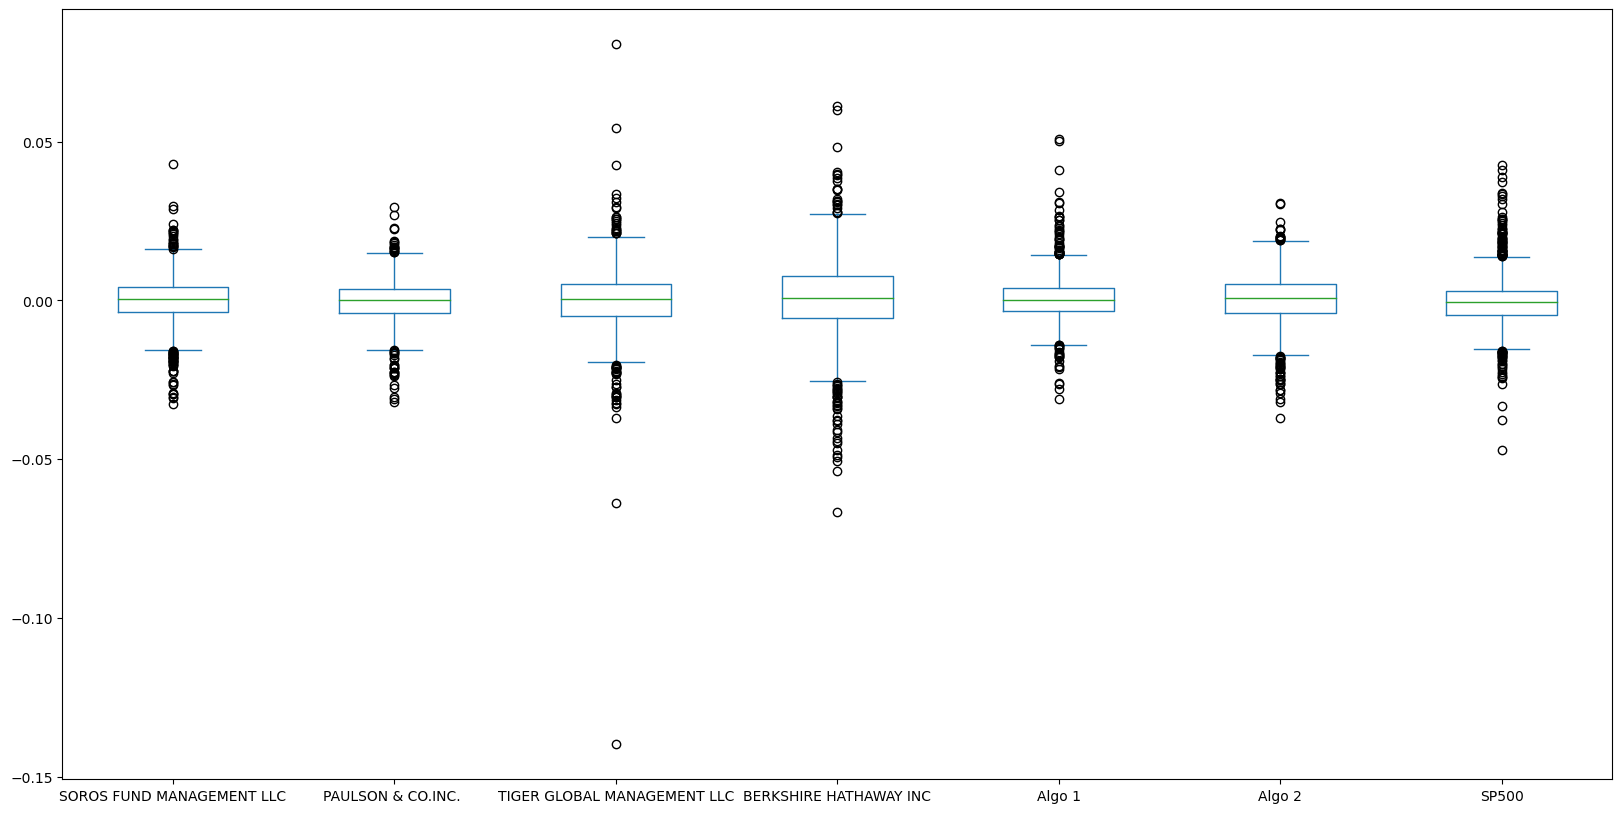

In [21]:
# Box plot to visually show risk
all_portfolios_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
daily_std_all_portfolios_df= all_portfolios_df.std()
daily_std_all_portfolios_df.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = all_portfolios_df['SP500'].std()
sp500_std

# Determine which portfolios are riskier than the S&P 500
all_portfolios_df.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_all_portfolios= all_portfolios_cumulative_ret.std() * np.sqrt(252)
annualized_std_all_portfolios

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
SP500                          1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_all_portfolios = all_portfolios_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_all_portfolios.plot

### Calculate and plot the correlation

In [26]:
all_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:>

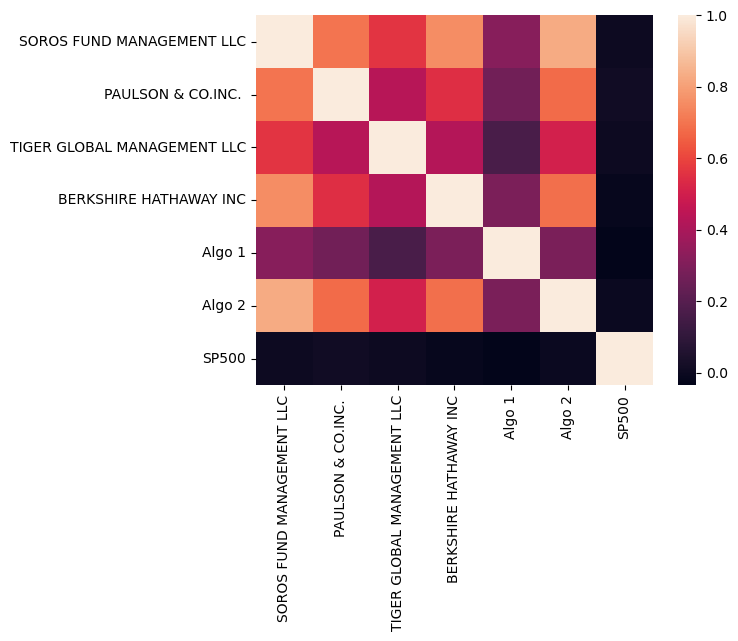

In [27]:
# Calculate the correlation
correlation = all_portfolios_df.corr()

# Display the correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio
covariance = all_portfolios_df['Algo 1'].rolling(window=60).cov(all_portfolios_df['SP500'])
# Calculate variance of S&P 500
variance = all_portfolios_df['SP500'].rolling(60).var()
# Computing beta
beta=covariance/variance

# Plot beta trend
beta.plot

In [29]:
all_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

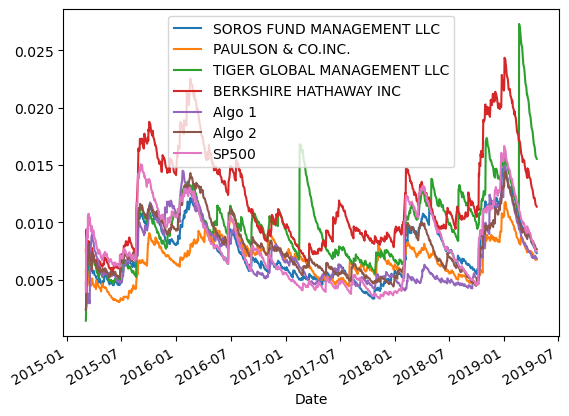

In [30]:
# Use `ewm` to calculate the rolling window
all_portfolios_df.ewm(halflife=21).std()
ewmplot=all_portfolios_df.ewm(halflife=21).std()
ewmplot.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (all_portfolios_df.mean() * 252 / (all_portfolios_df.std() * np.sqrt(252))
)




<AxesSubplot:title={'center':'Sharpe Ratios'}>

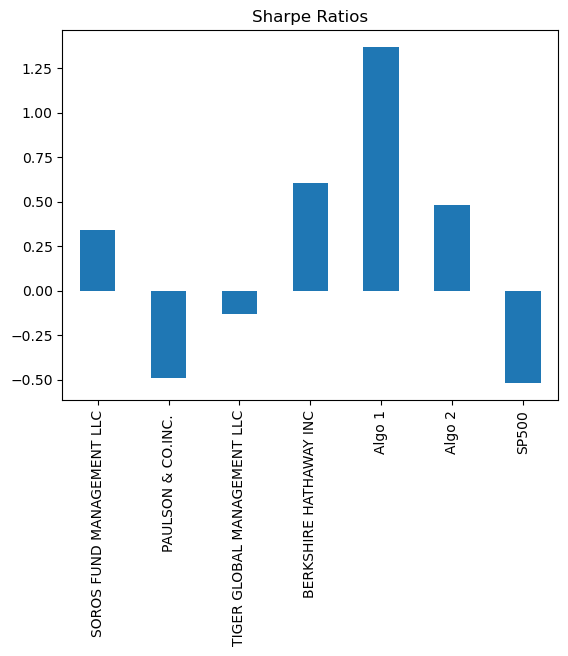

In [32]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
google_historical_csv = Path("Resources/goog_historical.csv")
google_historical = pd.read_csv(
    google_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).sort_index()
googl_historical=google_historical.rename(columns={'NOCP':'GOOG'})
goog_hist=googl_historical.drop(columns='Symbol')
goog_hist

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
...,...
2019-05-03,1185.40
2019-05-06,1189.39
2019-05-07,1174.10


In [34]:
# Reading data from 2nd stock
apple_historical_csv = Path("Resources/aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).sort_index()
appl_historical=apple_historical.rename(columns={'NOCP':'AAPL'})
app_hist=appl_historical.drop(columns='Symbol')
app_hist

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [35]:
# Reading data from 3rd stock
costco_historical_csv = Path("Resources/cost_historical.csv")
costco_historical = pd.read_csv( costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).sort_index()
cost_historical=costco_historical.rename(columns={'NOCP':'COST'})
cost_hist=cost_historical.drop(columns='Symbol')
cost_hist
                                               

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [36]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([goog_hist,app_hist,cost_hist], axis=1)
all_stocks

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [37]:
# Reset Date index
all_stocks_df = all_stocks#.reset_index()
all_stocks_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [38]:
# Reorganize portfolio data by having a column per symbol




In [39]:
# Calculate daily returns
daily_returns_all_stocks =all_stocks_df.pct_change()
# Drop NAs
daily_returns_all_stocks.dropna(inplace=True)
# Display sample data
daily_returns_all_stocks.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_all_stocks.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [55]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns=pd.concat([portfolio_returns,all_portfolios_df],axis=1)

In [63]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-15,0.007522,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [64]:
# Calculate the annualized `std`
daily_std = all_portfolio_returns.std()
annualized_std=daily_std*np.sqrt(252)
print(annualized_std)

0                              0.210262
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64


### Calculate and plot rolling `std` with 21-day window

In [45]:
# Calculate rolling standard deviation

twenty_one_day_correlation = annualized_std.rolling(window=21).std()



# Plot rolling standard deviation
twenty_one_day_correlation.plot

### Calculate and plot the correlation

<AxesSubplot:>

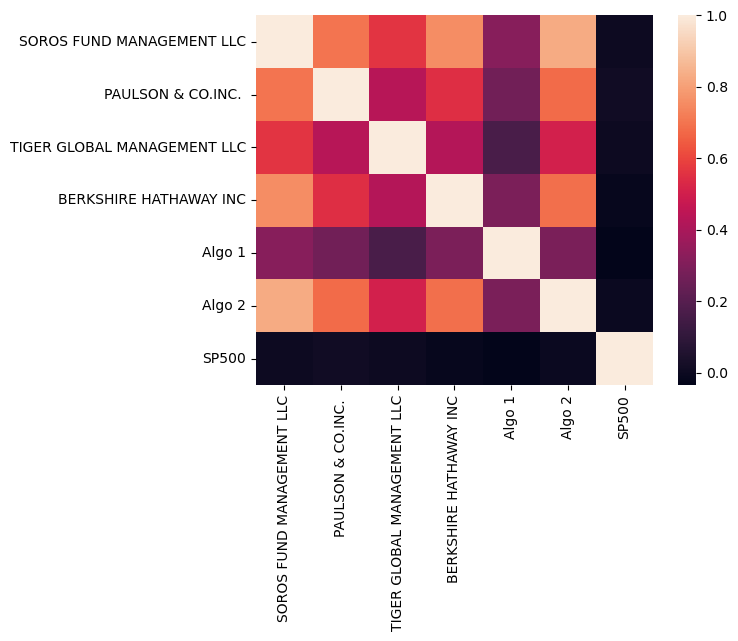

In [46]:
# Calculate and plot the correlation
twenty_one_day_correlation = all_portfolios_df.corr()

# Display the correlation matrix
sns.heatmap(twenty_one_day_correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
rolling_sixty_std_annualized_std = annualized_std.rolling(window=60).std()
# Calculate covariance of a single portfolio
covariance = all_portfolios_df['Algo 1'].rolling(window=60).cov(all_portfolios_df['SP500'])
# Calculate variance of S&P 500
variance = all_portfolios_df['SP500'].rolling(60).var()
# Computing beta
beta=covariance/variance

# Plot beta trend
beta.plot


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!